# Iris dataset


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
from sklearn import metrics

iris=sns.load_dataset("iris")

### Cleaning

In [6]:
def clean_data(df):
    df=df.drop_duplicates()
    df = df.apply(pd.to_numeric, errors='ignore')
    df.columns = [col.strip() for col in df.columns]
    df.columns = [col.lower() for col in df.columns]
    df.columns = [col.replace(' ', '_') for col in df.columns]
    for i in df.columns:
        if df[i].isnull().sum()>0:
            df = df.dropna(subset=[i])

    return df

### Exploring data


In [9]:
def explore_data(df):
    print(df.describe())
    row_indexmax = df["petal_length"].idxmax()
    print("largest species:", df.loc[row_indexmax, "species"])
    row_indexmin = df["petal_length"].idxmin()
    print("smallest species:", df.loc[row_indexmin, "species"])

    numeric_df = df.select_dtypes(include="number")
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(numeric_df)
    wss = []
    ch_scores=[]
    for i in range(2, 11):
        kmeans=KMeans(n_clusters=i, random_state=0)
        kmeans.fit(df_scaled[:, 0:3])
        wss.append(kmeans.inertia_)

        labels = kmeans.labels_
        ch_index = metrics.calinski_harabasz_score(df_scaled[:, 0:3], labels)
        ch_scores.append(ch_index)

    wss0 = wss[0]
    pve = [(wss0 - w) / wss0 for w in wss]
    plt.plot(range(2, 11), pve, marker='o')
    plt.title('Elbow method')
    plt.xlabel("Number of clusters")
    plt.ylabel("Proportion of variation explained")
    plt.show()

    plt.plot(range(2, 11), ch_scores, marker='o')
    plt.title('Calinski-Harabasz Index')
    plt.xlabel('Index')
    plt.ylabel('Number of Clusters')
    plt.show()

    d = pdist(df_scaled)
    Z = hierarchy.linkage(d, method='single')

    plt.figure(figsize=(10, 4))
    hierarchy.dendrogram(Z, labels=df["species"].values)
    plt.show()

    sns.set_theme(style="ticks")
    f, ax = plt.subplots(figsize=(7, 5))
    sns.despine(f)
    sns.histplot(df,
        x="petal_length", hue="species",
        multiple="stack",
        palette="light:m_r",
        edgecolor=".3",
        linewidth=.5,
        log_scale=True,
    )
    plt.show()

    sns.lmplot(
        data=df, x="sepal_length", y="sepal_width", hue="species",
    )
    plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18068\1449562308.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
largest species: virginica
smallest species: setosa


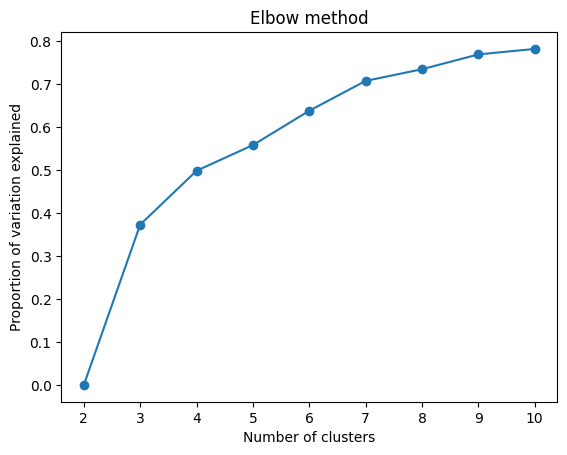

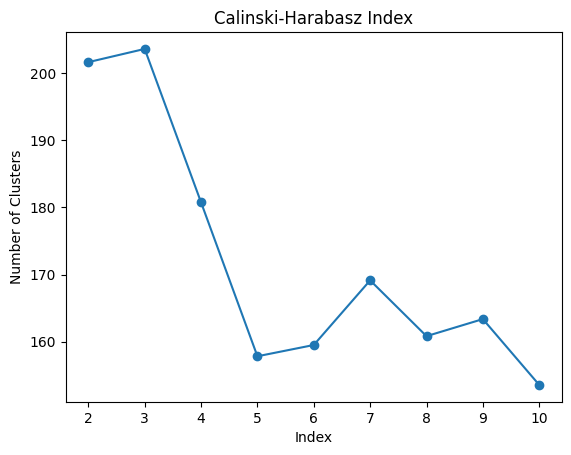

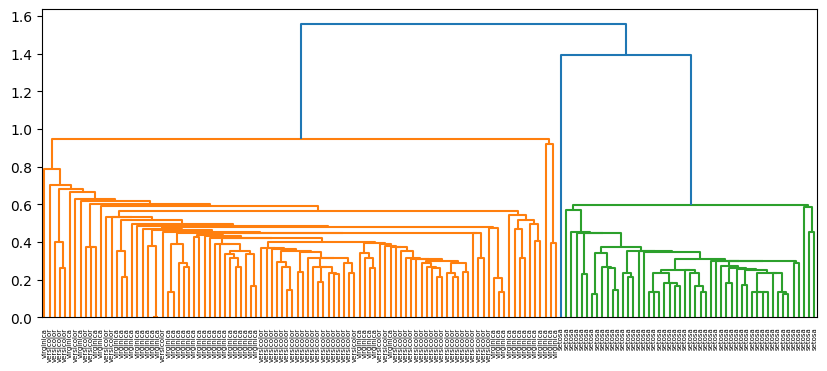

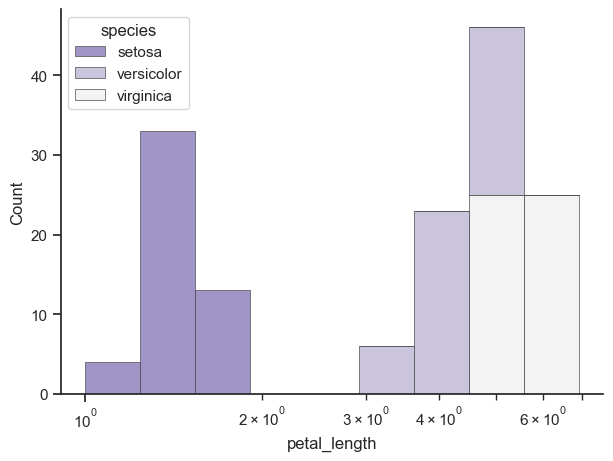

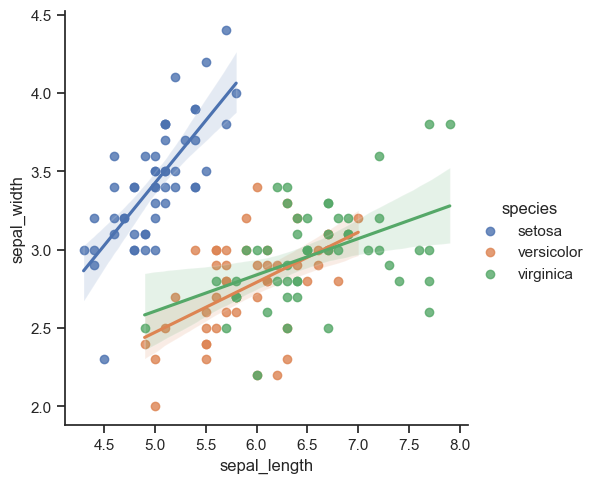

In [10]:

iris_clean = clean_data(iris)
explore_data(iris)

In [11]:
numeric_iris = iris.select_dtypes(include="number")
scaler = StandardScaler()
iris_scaled= scaler.fit_transform(numeric_iris)
kmeans = KMeans(n_clusters=3)
kmeans.fit(iris_scaled)
iris["cluster"] = kmeans.labels_
summary = numeric_iris.copy()
summary["cluster"] = kmeans.labels_
print("\nSummary table:")
print(summary.groupby("cluster").agg(["mean", "count"]))


Summary table:
        sepal_length       sepal_width       petal_length       petal_width  \
                mean count        mean count         mean count        mean   
cluster                                                                       
0           5.006000    50    3.428000    50     1.462000    50    0.246000   
1           6.725490    51    3.082353    51     5.462745    51    1.960784   
2           5.779592    49    2.653061    49     4.326531    49    1.379592   

               
        count  
cluster        
0          50  
1          51  
2          49  


The species with the largest petal length is Virginica, while the species with the shortest petal length is Setosa.

I applied KMeans clustering with 3 clusters, because this number of clusters explains a large proportion of the variation (around 0.75), and as it is visible from the Calinski-Harabasz plot it has the highest CH index.

In this clustering, the first cluster contains the largest flowers overall, while the second cluster contains the smallest flowers on average.

From the hierarchical dendrogram, constructed using single linkage, one outlier from the Setosa species can be observed.